**Hi Everyone! I am one of Pacmann' School of Data students, and this is the project I need to work on in order to get my certification in Data Wrangling and SQL. You can read the full instructions [here](https://docs.google.com/document/d/1qeFNL-lqe54XxJoNIzDXQ3zg2lovyZYwv0Q3bY6-p24/preview#).**

#Library & Dataset

In [ ]:
# Import the libraries we're going to use
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Making connection to the database
con = sqlite3.connect("/content/gdrive/MyDrive/Dataset/olist.db")

#Table Descriptions

**Based on those datasets, these are several objectives I want to find out:**
1. What's the most bought product?
2. Which city that's buying the most often?
3. Which customer that's buying the most often?
4. Which Product can we improve?

In [ ]:
# Filter the columns we might use
query = """
SELECT olist_order_items_dataset.order_id, olist_order_items_dataset.product_id, olist_order_items_dataset.seller_id,
product_category_name_translation.product_category_name, product_category_name_translation.product_category_name_english,
olist_order_customer_dataset.customer_id, olist_order_customer_dataset.customer_unique_id, olist_order_customer_dataset.customer_city, olist_order_customer_dataset.customer_state 
FROM olist_order_items_dataset
JOIN olist_products_dataset
ON olist_order_items_dataset.product_id = olist_products_dataset.product_id
JOIN product_category_name_translation
ON olist_products_dataset.product_category_name = product_category_name_translation.product_category_name
JOIN olist_order_dataset
ON olist_order_dataset.order_id = olist_order_items_dataset.order_id
JOIN olist_order_customer_dataset
ON olist_order_customer_dataset.customer_id = olist_order_dataset.customer_id
"""

In [ ]:
product_ordered = pd.read_sql(query, con)
product_ordered.head(10)

,order_id,product_id,seller_id,product_category_name,product_category_name_english,customer_id,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,cool_stuff,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,pet_shop,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,moveis_decoracao,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,perfumaria,perfumery,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,ferramentas_jardim,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP
5,00048cc3ae777c65dbb7d2a0634bc1ea,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,utilidades_domesticas,housewares,816cbea969fe5b689b39cfc97a506742,85c835d128beae5b4ce8602c491bf385,uberaba,MG
6,00054e8431b9d7675808bcb819fb4a32,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,telefonia,telephony,32e2e6ab09e778d99bf2e0ecd4898718,635d9ac1680f03288e72ada3a1035803,guararapes,SP
7,000576fe39319847cbb9d288c5617fa6,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,ferramentas_jardim,garden_tools,9ed5e522dd9dd85b4af4a077526d8117,fda4476abb6307ab3c415b7e6d026526,praia grande,SP
8,0005a1a1728c9d785b8e2b08b904576c,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,beleza_saude,health_beauty,16150771dfd4776261284213b89c304e,639d23421f5517f69d0c3d6e6564cf0e,santos,SP
9,0005f50442cb953dcd1d21e1fb923495,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,livros_tecnicos,books_technical,351d3cb2cee3c7fd0af6616c82df21d3,0782c41380992a5a533489063df0eef6,jandira,SP


In [ ]:
# Check out the raw data condition
product_ordered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111023 entries, 0 to 111022
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       111023 non-null  object
 1   product_id                     111023 non-null  object
 2   seller_id                      111023 non-null  object
 3   product_category_name          111023 non-null  object
 4   product_category_name_english  111023 non-null  object
 5   customer_id                    111023 non-null  object
 6   customer_unique_id             111023 non-null  object
 7   customer_city                  111023 non-null  object
 8   customer_state                 111023 non-null  object
dtypes: object(9)
memory usage: 7.6+ MB


In [ ]:
product_ordered.describe(include="all")

,order_id,product_id,seller_id,product_category_name,product_category_name_english,customer_id,customer_unique_id,customer_city,customer_state
count,111023,111023,111023,111023,111023,111023,111023,111023,111023
unique,97256,32328,3033,71,71,97256,94088,4095,27
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,cama_mesa_banho,bed_bath_table,fc3d1daec319d62d49bfb5e1f83123e9,c8460e4251689ba205045f3ea17884a1,sao paulo,SP
freq,21,527,2033,11115,11115,21,24,17512,46782


# Data Cleansing

In [ ]:
# Checking out Missing Values
product_ordered.isna().sum()

order_id                         0
product_id                       0
seller_id                        0
product_category_name            0
product_category_name_english    0
customer_id                      0
customer_unique_id               0
customer_city                    0
customer_state                   0
dtype: int64

**We don't have missing values!**

In [ ]:
# Checking out duplicates value
product_ordered[product_ordered.duplicated(keep=False)]

,order_id,product_id,seller_id,product_category_name,product_category_name_english,customer_id,customer_unique_id,customer_city,customer_state
13,0008288aa423d2a3f00fcb17cd7d8719,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,ferramentas_jardim,garden_tools,2355af7c75e7c98b43a87b2a7f210dc5,9e4159995424971423b98c4a8bc11529,jandira,SP
14,0008288aa423d2a3f00fcb17cd7d8719,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,ferramentas_jardim,garden_tools,2355af7c75e7c98b43a87b2a7f210dc5,9e4159995424971423b98c4a8bc11529,jandira,SP
32,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,esporte_lazer,sports_leisure,2e45292979b9b2700ea09560eeb0f803,bb8a37225e0279ac8a274c9765617eaf,goiania,GO
33,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,esporte_lazer,sports_leisure,2e45292979b9b2700ea09560eeb0f803,bb8a37225e0279ac8a274c9765617eaf,goiania,GO
34,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,esporte_lazer,sports_leisure,2e45292979b9b2700ea09560eeb0f803,bb8a37225e0279ac8a274c9765617eaf,goiania,GO
...,...,...,...,...,...,...,...,...,...
111008,fff8287bbae429a99bb7e8c21d151c41,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,informatica_acessorios,computers_accessories,6c1e92a209dbf868706caa831090941e,028c09f007292c4e3a3b10d296e47987,joao pessoa,PB
111013,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,relogios_presentes,watches_gifts,4d3abb73ceb86353aeadbe698aa9d5cb,f736308cd9952b33b90b9fe94da9c8f5,serra talhada,PE
111014,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,relogios_presentes,watches_gifts,4d3abb73ceb86353aeadbe698aa9d5cb,f736308cd9952b33b90b9fe94da9c8f5,serra talhada,PE
111015,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,relogios_presentes,watches_gifts,4d3abb73ceb86353aeadbe698aa9d5cb,f736308cd9952b33b90b9fe94da9c8f5,serra talhada,PE


In [ ]:
product_ordered = product_ordered.drop_duplicates(keep="first")
product_ordered[product_ordered.duplicated(keep=False)]

,order_id,product_id,seller_id,product_category_name,product_category_name_english,customer_id,customer_unique_id,customer_city,customer_state


**We have handled the duplicates value!**

In [ ]:
product_ordered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100943 entries, 0 to 111022
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       100943 non-null  object
 1   product_id                     100943 non-null  object
 2   seller_id                      100943 non-null  object
 3   product_category_name          100943 non-null  object
 4   product_category_name_english  100943 non-null  object
 5   customer_id                    100943 non-null  object
 6   customer_unique_id             100943 non-null  object
 7   customer_city                  100943 non-null  object
 8   customer_state                 100943 non-null  object
dtypes: object(9)
memory usage: 7.7+ MB


## Checking out Inconsistent Format

In [ ]:
product_ordered["product_category_name"].unique()

array(['cool_stuff', 'pet_shop', 'moveis_decoracao', 'perfumaria',
       'ferramentas_jardim', 'utilidades_domesticas', 'telefonia',
       'beleza_saude', 'livros_tecnicos', 'fashion_bolsas_e_acessorios',
       'cama_mesa_banho', 'esporte_lazer', 'consoles_games',
       'moveis_escritorio', 'malas_acessorios', 'alimentos',
       'agro_industria_e_comercio', 'eletronicos',
       'informatica_acessorios', 'construcao_ferramentas_construcao',
       'audio', 'bebes', 'construcao_ferramentas_iluminacao',
       'brinquedos', 'papelaria', 'industria_comercio_e_negocios',
       'relogios_presentes', 'automotivo', 'eletrodomesticos',
       'moveis_cozinha_area_de_servico_jantar_e_jardim', 'climatizacao',
       'casa_conforto', 'telefonia_fixa', 'portateis_casa_forno_e_cafe',
       'fraldas_higiene', 'sinalizacao_e_seguranca',
       'instrumentos_musicais', 'eletroportateis',
       'construcao_ferramentas_jardim', 'artes', 'casa_construcao',
       'livros_interesse_geral', 'artigo

In [ ]:
product_ordered["product_category_name_english"].unique()

array(['cool_stuff', 'pet_shop', 'furniture_decor', 'perfumery',
       'garden_tools', 'housewares', 'telephony', 'health_beauty',
       'books_technical', 'fashion_bags_accessories', 'bed_bath_table',
       'sports_leisure', 'consoles_games', 'office_furniture',
       'luggage_accessories', 'food', 'agro_industry_and_commerce',
       'electronics', 'computers_accessories',
       'construction_tools_construction', 'audio', 'baby',
       'construction_tools_lights', 'toys', 'stationery',
       'industry_commerce_and_business', 'watches_gifts', 'auto',
       'home_appliances', 'kitchen_dining_laundry_garden_furniture',
       'air_conditioning', 'home_confort', 'fixed_telephony',
       'small_appliances_home_oven_and_coffee', 'diapers_and_hygiene',
       'signaling_and_security', 'musical_instruments',
       'small_appliances', 'costruction_tools_garden', 'art',
       'home_construction', 'books_general_interest', 'party_supplies',
       'construction_tools_safety', 'cine_p

In [ ]:
product_ordered["customer_city"].unique()

array(['campos dos goytacazes', 'santa fe do sul', 'para de minas', ...,
       'arara', 'mata', 'tenente ananias'], dtype=object)

In [ ]:
product_ordered["customer_id"].unique()

array(['3ce436f183e68e07877b285a838db11a',
       'f6dd3ec061db4e3987629fe6b26e5cce',
       '6489ae5e4333f3693df5ad4372dab6d3', ...,
       '29309aa813182aaddc9b259e31b870e6',
       'b5e6afd5a41800fdf401e0272ca74655',
       '96d649da0cc4ff33bb408b199d4c7dcf'], dtype=object)

In [ ]:
product_ordered["customer_state"].unique()

array(['RJ', 'SP', 'MG', 'PR', 'GO', 'BA', 'AL', 'MS', 'CE', 'DF', 'RS',
       'PE', 'SC', 'ES', 'MA', 'PA', 'MT', 'PB', 'AM', 'AP', 'PI', 'TO',
       'RO', 'RN', 'SE', 'AC', 'RR'], dtype=object)

**We don't have inconsistent format data!**

In [ ]:
product_ordered.head(10)

,order_id,product_id,seller_id,product_category_name,product_category_name_english,customer_id,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,cool_stuff,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,pet_shop,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,moveis_decoracao,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,perfumaria,perfumery,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,ferramentas_jardim,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP
5,00048cc3ae777c65dbb7d2a0634bc1ea,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,utilidades_domesticas,housewares,816cbea969fe5b689b39cfc97a506742,85c835d128beae5b4ce8602c491bf385,uberaba,MG
6,00054e8431b9d7675808bcb819fb4a32,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,telefonia,telephony,32e2e6ab09e778d99bf2e0ecd4898718,635d9ac1680f03288e72ada3a1035803,guararapes,SP
7,000576fe39319847cbb9d288c5617fa6,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,ferramentas_jardim,garden_tools,9ed5e522dd9dd85b4af4a077526d8117,fda4476abb6307ab3c415b7e6d026526,praia grande,SP
8,0005a1a1728c9d785b8e2b08b904576c,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,beleza_saude,health_beauty,16150771dfd4776261284213b89c304e,639d23421f5517f69d0c3d6e6564cf0e,santos,SP
9,0005f50442cb953dcd1d21e1fb923495,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,livros_tecnicos,books_technical,351d3cb2cee3c7fd0af6616c82df21d3,0782c41380992a5a533489063df0eef6,jandira,SP


# Data Manipulation

In [ ]:
# 10 Most bought order based on Product Category
most_bought_product = product_ordered[["product_category_name_english", "order_id"]].groupby("product_category_name_english").count().sort_values(by="order_id", ascending=False).reset_index().head(10)
most_bought_product

,product_category_name_english,order_id
0,bed_bath_table,10160
1,health_beauty,9022
2,sports_leisure,7858
3,computers_accessories,6887
4,furniture_decor,6781
5,housewares,6019
6,watches_gifts,5799
7,telephony,4287
8,auto,3991
9,toys,3979


**1. Based on the result above, `bed_bath_table` is the most popular product in the platform. there are three products whose gap are quite big (above 1000 orders) with its previous level. They are `health_beauty`, `sports_leisure`, and `telephony`. The item variety in these category could be improved in order to deepen our Product Variety Speciality.**

In [ ]:
# 10 Cities with the most buying orders
most_bought_city = product_ordered[["customer_city", "order_id"]].groupby("customer_city").count().sort_values(by="order_id", ascending=False).reset_index().head(10)
most_bought_city

,customer_city,order_id
0,sao paulo,15812
1,rio de janeiro,6952
2,belo horizonte,2807
3,brasilia,2171
4,curitiba,1543
5,campinas,1471
6,porto alegre,1413
7,salvador,1268
8,guarulhos,1201
9,sao bernardo do campo,936


**2. We should considerate to give free delivery fee or having our own mailman branch to `sao paulo` and `rio de janeiro` to keep our loyal user there.**

In [ ]:
# 10 Customers with the most buying orders
most_bought_customer = product_ordered[["customer_id", "order_id"]].groupby("customer_id").count().sort_values(by="order_id", ascending=False).reset_index().head(10)
most_bought_customer

,customer_id,order_id
0,0d861a5e4dd6a9079d89e1330848f0ab,8
1,a67a246af6ba598a14cc86df3c0354ee,7
2,1205480caca6c37f55954da838933b8a,7
3,30bb84b541c96af98ba7d90b9ebf35d0,7
4,223f5e3208f2fa202a8ff706a4d9b206,6
5,8c4bcd3c3737198f62421c18e0348554,6
6,5e312b0d9bf5c91599eb42120e633b19,6
7,be1c4e52bb71e0c54b11a26b8e8d59f2,6
8,50920f8cd0681fd86ebe93670c8fe52e,6
9,c9b6ccc9f42e3ac60bb09a0f53a09973,6


**3. We need to give reward to our 10 most loyal user i.e free delivery fee or discount.**

In [ ]:
# 10 Cities with the least buying orders
least_bought_city = product_ordered[["customer_city", "product_category_name_english", "order_id"]].groupby(["product_category_name_english","customer_city",]).count().sort_values(by="order_id", ascending=False).reset_index().tail(50)
least_bought_city

,product_category_name_english,customer_city,order_id
25149,food_drink,monte mor,1
25150,food_drink,malacacheta,1
25151,food_drink,maceio,1
25152,food_drink,macau,1
25153,food_drink,londrina,1
25154,food_drink,itapolis,1
25155,food_drink,limeira,1
25156,food_drink,lavras,1
25157,food_drink,juiz de fora,1
25158,food_drink,joinville,1


**4. By Varying our item selection in `food` we most likely can expand our area coverage in several cities.**

In [ ]:
product_ordered[["product_category_name_english", "order_id"]].groupby(["product_category_name_english"]).count().sort_values(by="order_id", ascending=False).tail(10)

,order_id
product_category_name_english,
music,38
flowers,29
diapers_and_hygiene,27
fashion_sport,27
home_comfort_2,24
arts_and_craftmanship,24
la_cuisine,13
cds_dvds_musicals,12
fashion_childrens_clothes,8


# Data Visualization

<Axes: xlabel='order_id', ylabel='product_category_name_english'>

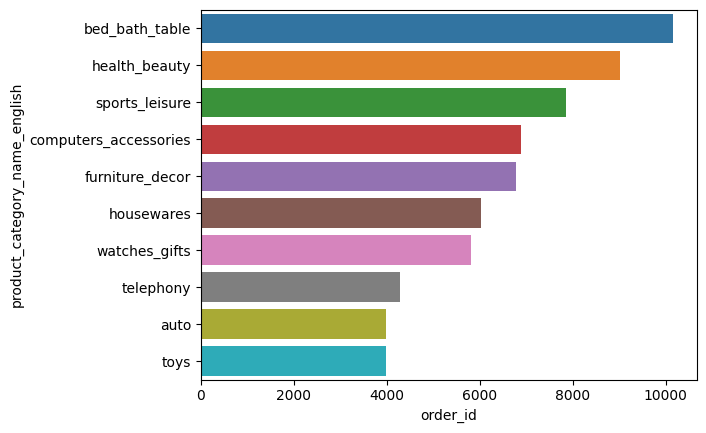

In [ ]:
sns.barplot(x = most_bought_product['order_id'],
            y = most_bought_product['product_category_name_english']) 

<Axes: xlabel='order_id', ylabel='customer_city'>

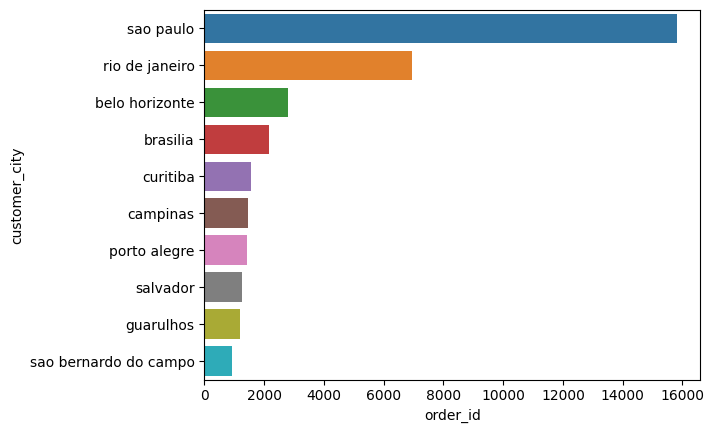

In [ ]:
sns.barplot(data=most_bought_city, x="order_id", y="customer_city")

<Axes: xlabel='order_id', ylabel='customer_id'>

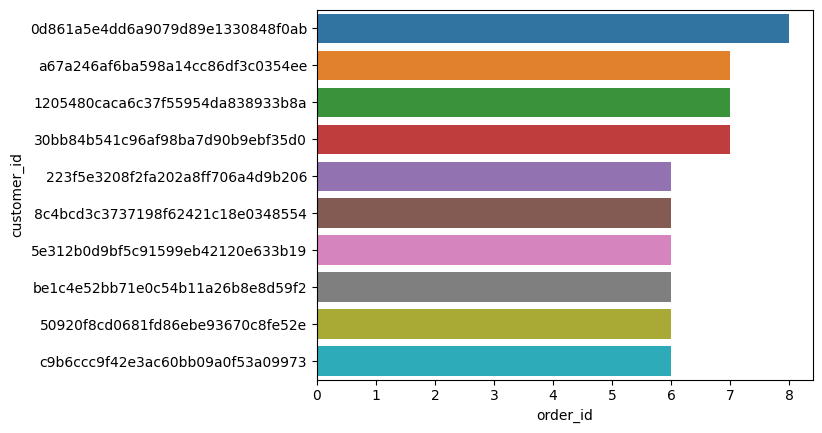

In [ ]:
sns.barplot(data=most_bought_customer, x="order_id", y="customer_id")